In [1]:
import config
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
distinctiveness = pd.read_csv(config.data_file_locations["distinctiveness_csv"], index_col=0)
distinctiveness = distinctiveness.rename({"image_id":"image_ID"}, axis=1)
distinctiveness["image_ID"] = distinctiveness["image_ID"].apply(str)
print(distinctiveness.shape)
distinctiveness.head()

(12371, 8)


,rendered_character,simplified_character,period,image_ID,distinctiveness,nearest neighbours,perimetric_complexity,pixel_complexity
0,前,前,Bronze,B01803,110.978666,"['井', '古', '丹', '女', '台', '豆', '身', '昌', '廿', ...",11.801370,16438.0
1,祭,祭,Bronze,B00236,136.835628,"['而', '救', '匡', '鸣', '无', '纯', '敬', '任', '明', ...",18.110078,25684.0
2,侄,侄,Bronze,B16981,143.194863,"['动', '蕃', '始', '胃', '尽', '谓', '差', '顾', '无', ...",8.596838,17919.0
3,县,县,Bronze,B13840,123.256749,"['知', '廿', '慕', '酱', '忽', '彼', '博', '加', '边', ...",18.035109,26406.0
4,梁,梁,Bronze,B08733,133.984279,"['执', '梅', '鹿', '礼', '纯', '业', '封', '事', '筑', ...",16.958024,22199.0


<AxesSubplot:xlabel='perimetric_complexity', ylabel='distinctiveness'>

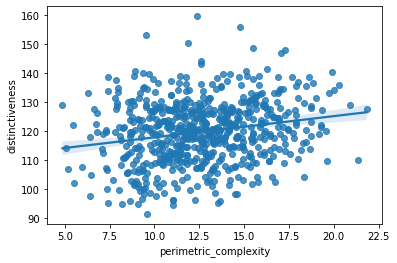

In [3]:
sns.regplot(x="perimetric_complexity", y="distinctiveness", data=distinctiveness[distinctiveness["period"]=="Oracle"])

<AxesSubplot:xlabel='perimetric_complexity', ylabel='distinctiveness'>

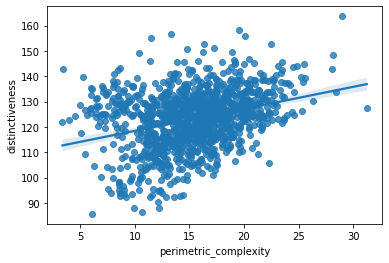

In [4]:
sns.regplot(x="perimetric_complexity", y="distinctiveness", data=distinctiveness[distinctiveness["period"]=="Bronze"])

<AxesSubplot:xlabel='perimetric_complexity', ylabel='distinctiveness'>

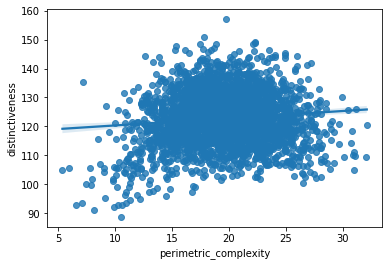

In [5]:
sns.regplot(x="perimetric_complexity", y="distinctiveness", data=distinctiveness[distinctiveness["period"]=="Seal"])

<AxesSubplot:xlabel='perimetric_complexity', ylabel='distinctiveness'>

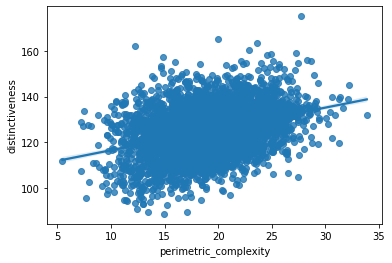

In [6]:
sns.regplot(x="perimetric_complexity", y="distinctiveness", data=distinctiveness[distinctiveness["period"]=="Traditional"])

<AxesSubplot:xlabel='perimetric_complexity', ylabel='distinctiveness'>

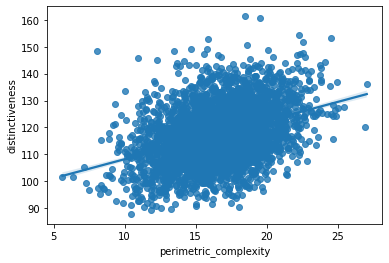

In [7]:
sns.regplot(x="perimetric_complexity", y="distinctiveness", data=distinctiveness[distinctiveness["period"]=="Simplified"])

In [8]:
PERIOD_MAP = {"Oracle":1, "Bronze":2, "Seal":3, "Traditional":4, "Simplified":5}

<AxesSubplot:xlabel='period', ylabel='distinctiveness'>

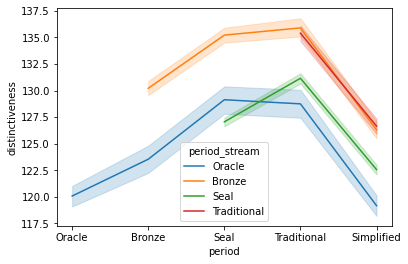

In [10]:
stream_distinctiveness = pd.read_csv(config.data_file_locations["persistent_distinctiveness_csv"], index_col=0)
stream_distinctiveness = stream_distinctiveness[stream_distinctiveness["period_stream"] != "Simplified"]
stream_distinctiveness["period_id"] = stream_distinctiveness["period"].apply(lambda x: PERIOD_MAP[x])
stream_distinctiveness = stream_distinctiveness.sort_values(by="period_id")
stream_distinctiveness.head()
sns.lineplot(x="period", y="distinctiveness", hue="period_stream", data=stream_distinctiveness)

<AxesSubplot:xlabel='period', ylabel='distinctiveness'>

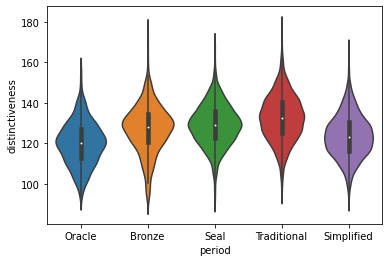

In [11]:
sns.violinplot(x="period", y="distinctiveness", data=stream_distinctiveness)